# **Evaluación de modelos de clasificación**

En esta práctica, veremos cómo evaluar un modelo de clasificación con las diversas métricas vistas en la parte teórica.

Trabajaremos con uno de los datasets provisto por Scikit-learn referente a Iris.

In [193]:
import numpy as np # importa np
import matplotlib.pyplot as plt # importa plt para plottear
from sklearn import datasets #datasets herramienta sklearn

In [194]:
iris = datasets.load_iris() # Aplica la herramienta recientemente importada de sklearn Load and return the iris dataset (classification).
# las X van a ser las variables Explicativas del modelo, las y las Variables Objetivo del modelo
X = iris.data # auto reconoce las x como data (al parecer esto ya lo hizo datasets)
y = iris.target

In [195]:
print(X,y) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [196]:
# cargando el conjunto de datos Iris desde scikit-learn
iris = datasets.load_iris()

# extrayendo las características (features) del conjunto de datos
X = iris.data 

# extrayendo las etiquetas (labels) del conjunto de datos
y = iris.target


En resumen, el código carga el conjunto de datos Iris desde la biblioteca scikit-learn, extrae las características y las etiquetas del conjunto de datos y las almacena en las variables X e y, respectivamente. Las características son un conjunto de variables numéricas que describen cada muestra del conjunto de datos, mientras que las etiquetas son las clases a las que pertenecen las muestras. En el caso de Iris, hay tres clases: Iris Setosa, Iris Versicolour e Iris Virginica.

In [197]:
len(y) # El código len(y) devuelve el número de elementos en la variable y.

150

In [198]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [199]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Ahora que definimos nuestras variables predictoras **X** y la etiqueta a predecir **y**, vamos a separar nuestros datos en entrenamiento y testeo. Utilizaremos el 20% del dataset para evaluar.

###  vamos a SEPARAR NUESTROS DATOS DE ENTRENAMIENTO Y TESTEO. Utilizaremos el 20% del dataset para evaluar. (se aconseja el 30% para obtener mejores resultados mas adelante)

In [200]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Vamos a trabajar con un modelo de vecinos más cercanos. Seguimos el flujo de trabajo de ML en Scikit-learn.

In [201]:
from sklearn.neighbors import KNeighborsClassifier # Importo la libreria vecinos mas cercanos.
classifier = KNeighborsClassifier(n_neighbors=5) # Instanciamos el modelo clasificador; establezco la cantidad de vecinos mas cercanos con la que quiero que compare.


In [202]:
classifier.fit(X_train, y_train) # Entrenamos el modelo. Para ello, usamos nuestro set de entrenamiento ya spliteado.

KNeighborsClassifier()

In [203]:
y_train_pred = classifier.predict(X_train) # Predecimos sobre nuestro set de entrenamieto, los posibles resultados del set de entrenamiento X_train
y_test_pred = classifier.predict(X_test) # Predecimos sobre nuestro set de testeo, ahora los posibles resultados de datos que el modelo nunca vio, se los escondimos, 
# justamente para testear y poder luego evaluar el desempeño, es decir, si el modelo acerto o no en su clasificacion.


## **`Matriz de confusión`**

Veamos la matriz de nuestro modelo

In [204]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred) # lo que le envio a la matrix de connfusion (variables objetivo de entrenamiento y_train , los y_train_pred "y de train set predichos por el modelo consutruido")
matrix_2 = confusion_matrix(y_test, y_test_pred) # ahora igual, creo una matrix de confusion y le paso las variables objetivo test y_test , los y_test_pre "y de test set predichos por el modelo consutruido"

In [205]:
matrix

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  1, 38]], dtype=int64)

In [206]:
matrix_2

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### *Grafiquemos la matriz*  https://docs.google.com/drawings/d/14Mio2XVFZnZsABrPQrF88C44GvN8cngYlWXQ_pwkunc/edit?usp=sharing

In [207]:
from sklearn.metrics import ConfusionMatrixDisplay # de sklearn metrics traeme la lib ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix) # que la variable cm_display = al display de la matrix
cm_display_2 = ConfusionMatrixDisplay(matrix_2) # que la variable cm_display_2 = al display de la matrix_2


In [208]:
# una forma muy interesante de plotear un grafo un poco mas simple.
# fig, ax = plt.subplots(figsize=(4,5))

# ax.matshow(matrix)
# for (i, j), z in np.ndenumerate(matrix):
#     ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
# plt.show()

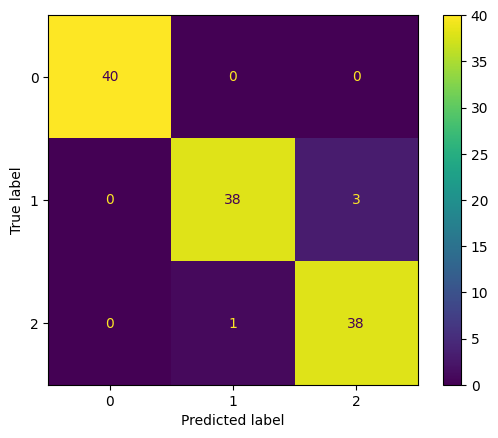

In [209]:
# Otra forma más sencilla de realizar la gráfica es la siguiente
cm_display.plot()
plt.show()

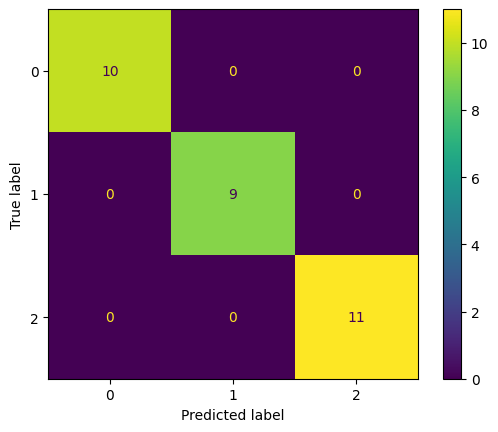

In [210]:
cm_display_2.plot()
plt.show()

### **`Exactitud - Exactitud = (Número de predicciones correctas) / (Número total de predicciones)`**

In [211]:
from sklearn.metrics import accuracy_score# Se importa la función 'accuracy_score' del módulo 'metrics' de la librería 'scikit-learn'

exactitud = accuracy_score(y_test, y_test_pred)# Se calcula la exactitud del modelo comparando las etiquetas verdaderas 'y_test' con las predicciones del modelo 'y_test_pred'
print(exactitud)# Se imprime el valor de la exactitud

# 'accuracy_score' de la librería 'scikit-learn', la cual permite calcular la exactitud de un modelo de clasificación.
#  Luego, se utiliza esta función para calcular la exactitud del modelo, comparando las etiquetas verdaderas 'y_test' con las predicciones del modelo 'y_test_pred'.

1.0


### **`Precisión - Precisión = (Verdaderos positivos) / (Verdaderos positivos + Falsos positivos)`**

In [212]:
# de henry:
from sklearn.metrics import precision_score# Se importa la función 'precision_score' del módulo 'metrics' de la librería 'scikit-learn'

precision = precision_score(y_test, y_test_pred, average= None)# Se calcula la precisión del modelo para cada clase
print(precision)


[1. 1. 1.]


### **`Exhaustividad/Recall/Sensibilidad - Exhaustividad = (Verdaderos positivos) / (Verdaderos positivos + Falsos negativos)`**

In [213]:
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred, average= None)
print(precision)

[1. 1. 1.]


### **`F1-Score - F1-Score = 2 * (Precisión * Exhaustividad) / (Precisión + Exhaustividad)`**

In [214]:
from sklearn.metrics import f1_score

precision = f1_score(y_test, y_test_pred, average= None)
print(precision, type(precision))

[1. 1. 1.] <class 'numpy.ndarray'>



### **`Curvas ROC`**
ROC curves typically feature true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis. This means that the top left corner of the plot is the “ideal” point - a FPR of zero, and a TPR of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better. The “steepness” of ROC curves is also important, since it is ideal to maximize the TPR while minimizing the FPR.

Dejamos [aquí](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) la documentación pertinente.

Debemos trabajar con un método del preprocesamiento de datos -denominado *label_binarize*- que permita abordar un problema  de clasificación multiclase como si fuese binario. Esto lo hacemos ya que la métrica ROC se emplea para problemas binarios. Dejamos la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html) para que se interioricen un poco más acerca de esta función.

In [215]:
from sklearn.preprocessing import label_binarize # importa label binarize sirve para pasar a binario my (x;y)

In [216]:
# Binarizamos y_test

y_test = label_binarize(y_test, classes=[0, 1, 2]) # convierte a binario y_test
n_classes = y_test.shape[1] # guarda la cantidad de columnas que posee y_test
print(y_test[:5])

[[0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]]


Hasta este momento, nosotros veníamos trabajando con el método `predict` para poder predecir una etiqueta para un registro. 

Ahora veremos la funcionalidad de `predict_proba`, que indica la probabilidad de que una instancia pertenezca a una de las categorías de la variable de salida.

In [217]:
y_score = classifier.predict_proba(X_test) #`predict_proba`, que indica la probabilidad de que una instancia pertenezca a una de las categorías de la variable de salida; para todas las instancias x_test.
print(y_score[:5])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [218]:
# Computamos los valores de FPR (Tasa de falsos positivos) y TPR (tasa de verdaderos positivos), para luego realizar el gráfico de la curva ROC.
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Pasamos a graficar

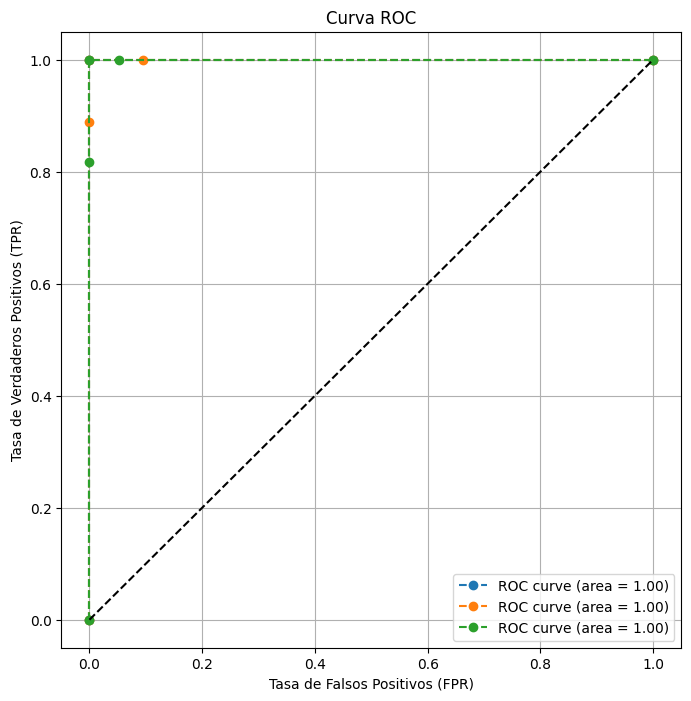

In [219]:
plt.figure(figsize=(8,8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()


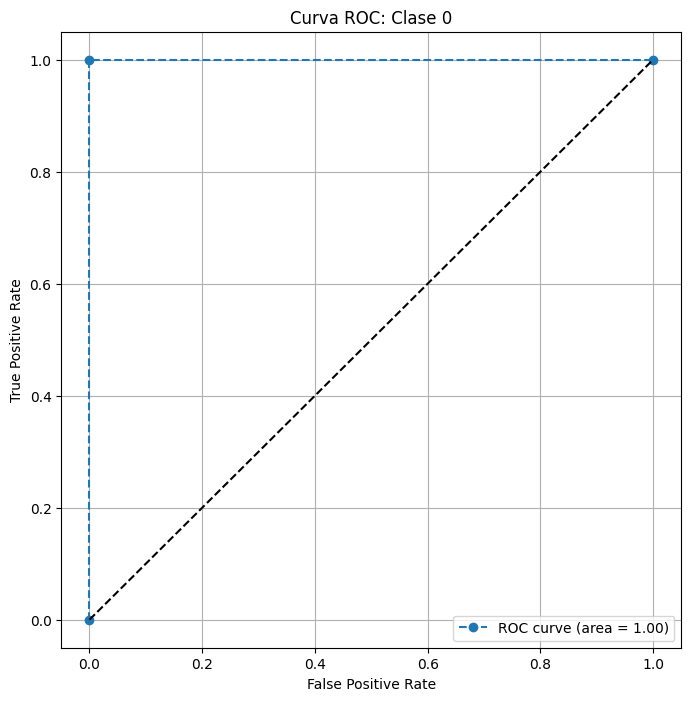

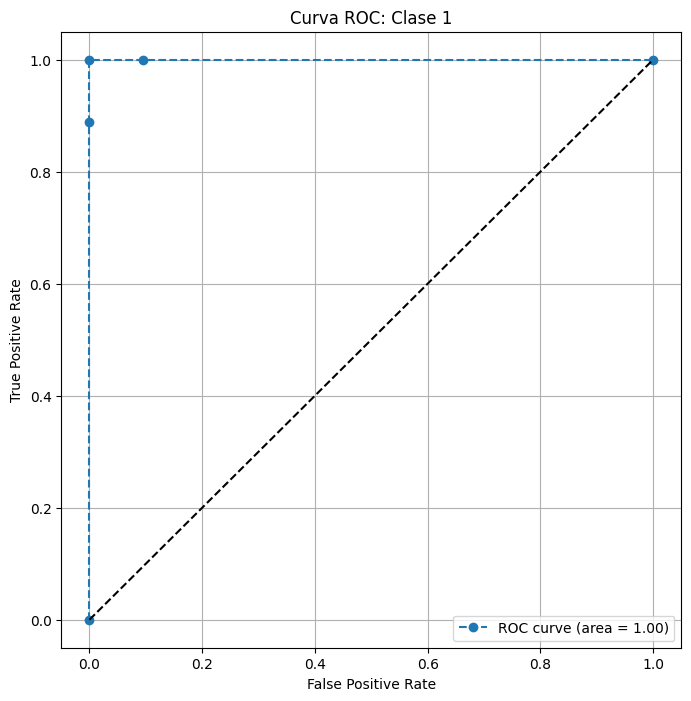

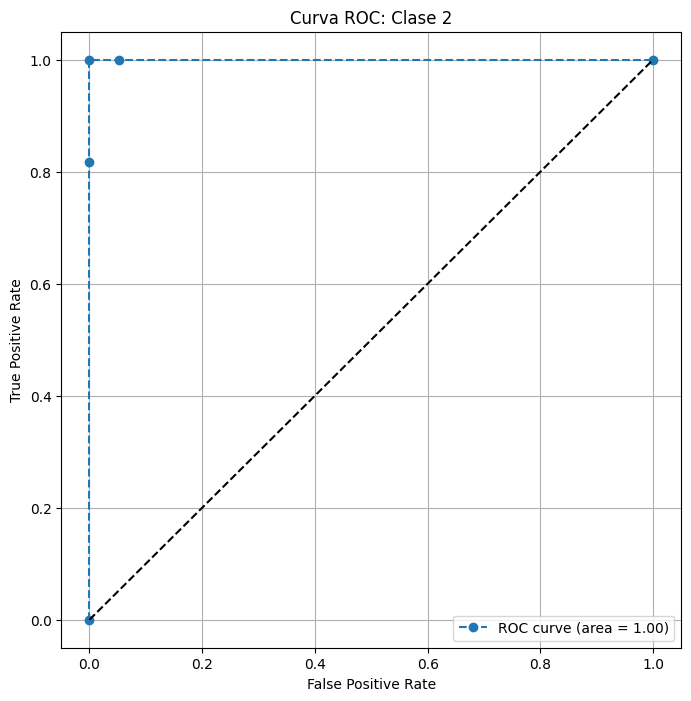

In [220]:
# Recorremos con un bucle cada una de las clases


for i in range(n_classes):
    plt.figure(figsize=(8,8))
    plt.plot(fpr[i], tpr[i],'o--', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [221]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

# Definimos una función para calcular el área bajo la curva ROC para clasificación multiclase
def multiclass_roc_auc_score(y_test, y_pred, average= 'macro'):
    
    # Creamos una instancia de LabelBinarizer y ajustamos las etiquetas de prueba
    lb = LabelBinarizer()
    lb.fit(y_test)
    
    # Transformamos las etiquetas de prueba y las predicciones
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    
    # Calculamos el área bajo la curva ROC utilizando la métrica roc_auc_score de sklearn
    return roc_auc_score(y_test, y_pred, average=average)


In [222]:
print('El AUC-ROC multiclase:',multiclass_roc_auc_score(y_test, y_test_pred))

El AUC-ROC multiclase: 1.0
